In [1]:
import matplotlib.pyplot as plt


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from pathlib import Path
import sys
sys.path.append(str(Path.cwd() / "_scripts"))

In [74]:
import networkx as nx
from eppy.bunch_subclass import EpBunch
from geomeppy import IDF
import seaborn as sns
import polars as pl
import numpy as np
# from datetime import datetime
# from ladybug.dt import DateTime
# from matplotlib.patches import FancyArrowPatch
# from itertools import accumulate

from case_edits.ezcase import *
# from helpers.ep_helpers import *
# from helpers.ep_geom_helpers import *
# from helpers.geometry_interfaces import *
# from helpers.helpers import *
# from plan.helpers import get_plans_from_file
# from network.network import *
# from network.visuals import *
# from subsurfaces.logic import get_connecting_surface
# from helpers.read_sql import *

# from case_edits.epcase import EneryPlusCaseEditor
# from helpers.output_requests import request_sql

from helpers.variables import *
from helpers.variable_interfaces import *
from setup.setup import get_case_names, CaseData, retrieve_cases
from setup.plots import *
from setup.data_wrangle import *
from network.data_on_network import *

import matplotlib.cm as cm
import matplotlib as mpl


from matplotlib.colors import Colormap, Normalize, LinearSegmentedColormap
from setup.setup import create_directories

from helpers.ep_helpers import WallNormal
from subsurfaces.creator import SubsurfaceCreator

In [54]:
dir = create_directories()[0]
inputs_dir, outputs_dir, name = dir

In [87]:
name

'amb_b1'

In [83]:
path_to_inputs = get_path_to_inputs(inputs_dir)
path_to_outputs = get_path_to_outputs(outputs_dir)
case = initialize_case(path_to_outputs)

case.idf = add_rooms(case.idf, path_to_inputs)
case.idf = add_subsurfaces(case.idf, path_to_inputs)

In [73]:
pairs = get_subsurface_pairs_from_case(path_to_inputs)
pairs

[SSP(pair=(1, 9), type=DOOR, dims=(0.81, 2.03),
 SSP(pair=(1, 8), type=DOOR, dims=(0.81, 2.03),
 SSP(pair=(9, 7), type=DOOR, dims=(0.81, 2.03),
 SSP(pair=(9, 8), type=DOOR, dims=(0.81, 2.03),
 SSP(pair=(9, 6), type=DOOR, dims=(0.81, 2.03),
 SSP(pair=(8, 6), type=DOOR, dims=(0.81, 2.03),
 SSP(pair=(8, 10), type=DOOR, dims=(0.81, 2.03),
 SSP(pair=(10, 2), type=DOOR, dims=(0.81, 2.03),
 SSP(pair=(10, 3), type=DOOR, dims=(0.81, 2.03),
 SSP(pair=(10, 0), type=DOOR, dims=(0.81, 2.03),
 SSP(pair=(5, 8), type=DOOR, dims=(0.81, 2.03),
 SSP(pair=(<WallNormal.WEST: 270.0>, 1), type=WINDOW, dims=(0.71, 1.52),
 SSP(pair=(4, 0), type=DOOR, dims=(0.81, 2.03),
 SSP(pair=(0, <WallNormal.NORTH: 0.0>), type=WINDOW, dims=(0.71, 1.52),
 SSP(pair=(3, <WallNormal.NORTH: 0.0>), type=WINDOW, dims=(0.71, 1.52),
 SSP(pair=(<WallNormal.SOUTH: 180.0>, 1), type=WINDOW, dims=(0.71, 1.52)]

In [79]:
sc = SubsurfaceCreator(case.idf, pairs[-1])
sc.run()

SubsurfaceObjects.WINDOW
attrs in constr SubsurfaceObjects.WINDOW
hi im a window

CONSTRUCTION,
    Project External Window,    !- Name
    DefaultGlazing;           !- Outside Layer



In [85]:
case = create_ezcase(outputs_dir, inputs_dir)


out.idf does not exist


In [86]:
case.run_idf()

idf has changed - running case

/Applications/EnergyPlus-22-2-0/energyplus --weather /Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/weather_data/PALO_ALTO/CA_PALO-ALTO-AP_724937_23.EPW --output-directory /Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/oct_h4h_plans/case_amb_b1/results --idd /Applications/EnergyPlus-22-2-0/Energy+.idd /Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/base/01example/Minimal_AP_cfdc8a.idf

EnergyPlus Starting
EnergyPlus, Version 22.2.0-c249759bad, YMD=2024.10.29 16:39
Adjusting Air System Sizing
Adjusting Standard 62.1 Ventilation Sizing
Initializing Simulation
Reporting Surfaces
Beginning Primary Simulation
Initializing New Environment Parameters
Warming up {1}
Warming up {2}
Warming up {3}
Warming up {4}
Warming up {5}
Warming up {6}
Starting Simulation at 07/01/2017 for SUMMERDAY
Writing tabular output file results using HTML format.
Writing final SQL reports
EnergyPlus Run Time=00hr 00min  0.57sec


EnergyPlus Completed Successfully.


In [8]:
qoi1 = 'AFN Linkage Node 1 to Node 2 Volume Flow Rate'
qoi12 = 'AFN Linkage Node 2 to Node 1 Volume Flow Rate'

qoi2 = "Site Wind Speed"
qoi3 = "Site Wind Direction"

qoi4 = all_variables.afn.zone["ach"]

In [91]:
case_data = retrieve_cases()
sample_case  = case_data[0]
case_name, idf, sql, path_to_input, path_to_output = sample_case

In [92]:
sample_case

CaseData(case_name='amb_b1', idf=<geomeppy.idf.IDF object at 0x154349000>, sql=Energy SQLiteResult: /Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/oct_h4h_plans/case_amb_b1/results/eplusout.sql, path_to_input=PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/svg2plan/outputs2/case_amb_b1'), path_to_output=PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/oct_h4h_plans/case_amb_b1'))

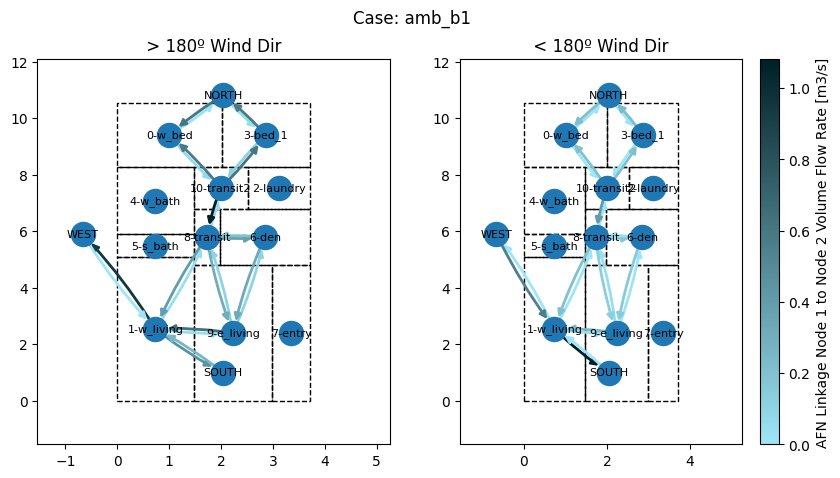

In [95]:
qois = [qoi1, qoi12]
fig = create_data_on_network_fig_facet_winddir(case_data, sample_case, qois)
